**Information Section:**

Full Name: Mohammad Navid Nayyem

Course Name: CSC 722 U15 - Machine Learning Fundamentals

Term: Spring 2024

**Assignment 02: Logistic Regression Code**

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from pandas import DataFrame
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_curve, auc, log_loss

In [2]:
!pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable


**Assignment**:

Use this dataset:

https://archive.ics.uci.edu/dataset/244/fertility

In [3]:
#from google.colab import drive
#drive.mount('/content/drive')

In [4]:
#df = pd.read_csv("/content/drive/MyDrive/fertility_Diagnosis.txt", header=None, names=['season', 'age', 'child_diseases', 'accident', 'surgical_intervention', 'high_fevers', 'alcohol', 'smoking', 'hrs_sitting', 'diagnosis'])
df = pd.read_csv("fertility_Diagnosis.txt", header=None, names=['season', 'age', 'child_diseases', 'accident', 'surgical_intervention', 'high_fevers', 'alcohol', 'smoking', 'hrs_sitting', 'diagnosis'])

In [5]:
df

,season,age,child_diseases,accident,surgical_intervention,high_fevers,alcohol,smoking,hrs_sitting,diagnosis
0,-0.33,0.69,0,1,1,0,0.8,0,0.88,N
1,-0.33,0.94,1,0,1,0,0.8,1,0.31,O
2,-0.33,0.50,1,0,0,0,1.0,-1,0.50,N
3,-0.33,0.75,0,1,1,0,1.0,-1,0.38,N
4,-0.33,0.67,1,1,0,0,0.8,-1,0.50,O
...,...,...,...,...,...,...,...,...,...,...
95,-1.00,0.67,1,0,0,0,1.0,-1,0.50,N
96,-1.00,0.61,1,0,0,0,0.8,0,0.50,N
97,-1.00,0.67,1,1,1,0,1.0,-1,0.31,N
98,-1.00,0.64,1,0,1,0,1.0,0,0.19,N


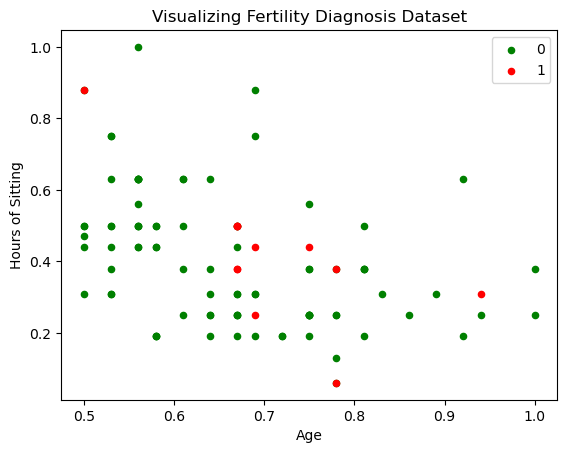

In [6]:
df['diagnosis'] = df['diagnosis'].map({'N': 0, 'O': 1})
X = df[['age', 'hrs_sitting']].values
Y = df['diagnosis'].values
colors = {0: 'green', 1: 'red'}
fig, ax = plt.subplots()
grouped = df.groupby('diagnosis')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='age', y='hrs_sitting', label=key, color=colors[key])
plt.xlabel('Age')
plt.ylabel('Hours of Sitting')
plt.title('Visualizing Fertility Diagnosis Dataset')
plt.show()

Logistic Model

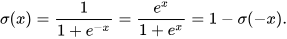

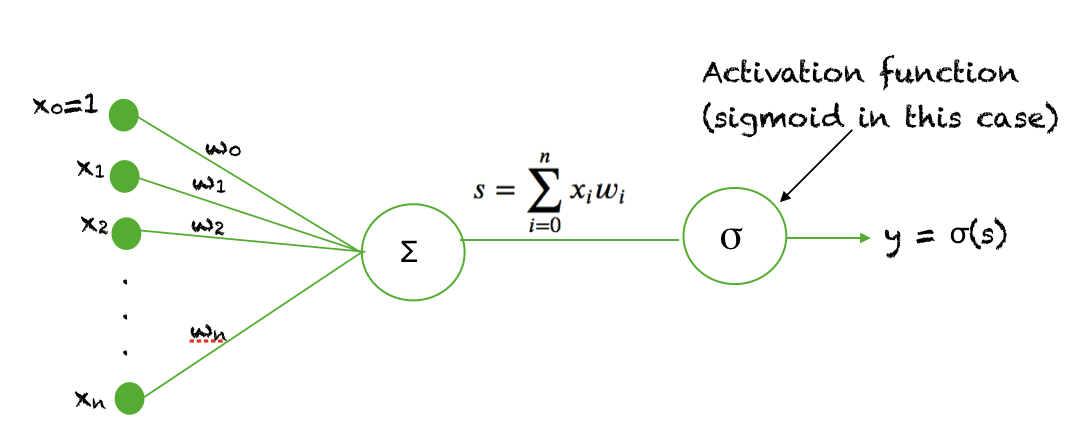

# Why The Sigmoid Function Is Important In Neural Networks?

If we use a linear activation function in a neural network, then this model can only learn linearly separable problems. However, with the addition of just one hidden layer and a sigmoid activation function in the hidden layer, the neural network can easily learn a non-linearly separable problem. Using a non-linear function produces non-linear boundaries and hence, the sigmoid function can be used in neural networks for learning complex decision functions.

The only non-linear function that can be used as an activation function in a neural network is one which is monotonically increasing. So for example, sin(x) or cos(x) cannot be used as activation functions. Also, the activation function should be defined everywhere and should be continuous everywhere in the space of real numbers. The function is also required to be differentiable over the entire space of real numbers.

Typically a back propagation algorithm uses gradient descent to learn the weights of a neural network. To derive this algorithm, the derivative of the activation function is required.

The fact that the sigmoid function is monotonic, continuous and differentiable everywhere, coupled with the property that its derivative can be expressed in terms of itself, makes it easy to derive the update equations for learning the weights in a neural network when using back propagation algorithm.

In [7]:
import numpy as np
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [8]:
def hx(w,X):
    z = np.array(w[0] + w[1]*np.array(X[:,0]) + w[2]*np.array(X[:,1]))
    return sigmoid(z)

Cost Function - Binary Cross Entropy

In [9]:
def cost(w, X, Y):
    y_pred = hx(w,X)
    return -1 * sum(Y*np.log(y_pred) + (1-Y)*np.log(1-y_pred))

Gradient Descent

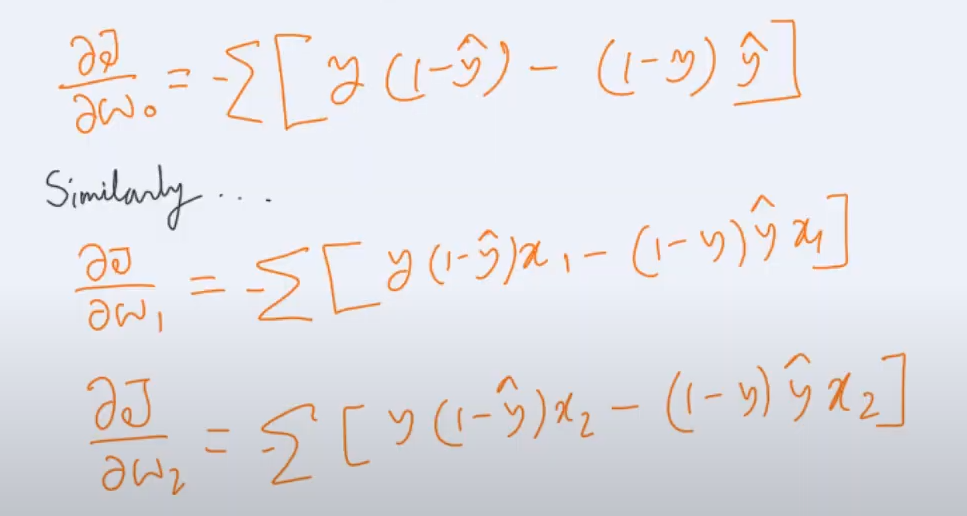

In [10]:
def grad(w, X, Y):
    y_pred = hx(w,X)
    g = [0]*3
    g[0] = -1 * sum(Y*(1-y_pred) - (1-Y)*y_pred)
    g[1] = -1 * sum(Y*(1-y_pred)*X[:,0] - (1-Y)*y_pred*X[:,0])
    g[2] = -1 * sum(Y*(1-y_pred)*X[:,1] - (1-Y)*y_pred*X[:,1])
    return g

In [11]:
def descent(w_new, w_prev, lr):
    print(w_prev)
    print(cost(w_prev, X, Y))
    j=0
    while True:
        w_prev = w_new
        w0 = w_prev[0] - lr*grad(w_prev, X, Y)[0]
        w1 = w_prev[1] - lr*grad(w_prev, X, Y)[1]
        w2 = w_prev[2] - lr*grad(w_prev, X, Y)[2]
        w_new = [w0, w1, w2]
        print(w_new)
        print(cost(w_new, X, Y))
        if (w_new[0]-w_prev[0])**2 + (w_new[1]-w_prev[1])**2 + (w_new[2]-w_prev[2])**2 <pow(10,-6):
            return w_new

        if j>100:
            return w_new
        j+=1

Initializing Parameters

In [12]:
w=[1,1,1]

Training the Model

In [13]:
w = descent(w,w,.0099)
print(w)

[1, 1, 1]
194.03980111156753
[0.2402458854007854, 0.49574384588692066, 0.689995456482794]
110.35379841708577
[-0.33449691686231764, 0.11562659737357323, 0.4537316983866918]
66.58584707454524
[-0.692764960255041, -0.11888581674930304, 0.30578667529939557]
49.910586076758364
[-0.9141342977469389, -0.2614424600330719, 0.21447673975377135]
43.42434580018227
[-1.0614035036850051, -0.35433882535511113, 0.15398530856019538]
40.511666187622374
[-1.1656938873973617, -0.4184852077334295, 0.11139912248758418]
39.04365852268157
[-1.242862934574731, -0.4645145920795376, 0.0801172672830052]
38.24221103569155
[-1.301770734877358, -0.4983587033067113, 0.05644748020758819]
37.7794708877099
[-1.347785580420699, -0.5236072280852652, 0.038151979431072285]
37.50120626967029
[-1.3843735839139468, -0.54257571988786, 0.023785995180204987]
37.32864994931923
[-1.413885715185096, -0.5568335886358892, 0.012369786051336814]
37.21901205875525
[-1.4379791215229358, -0.5674864221837337, 0.003212940226496555]
37.14792

Lets visualize the Results

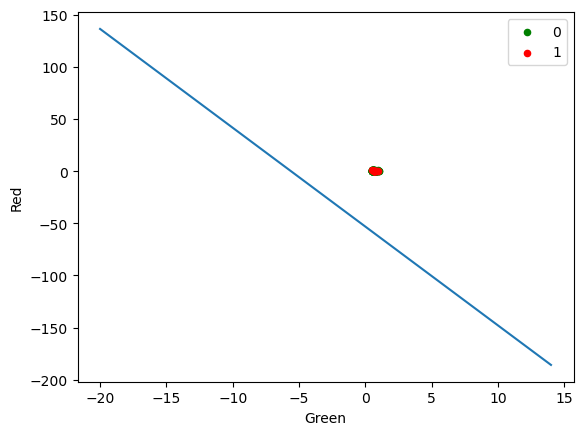

In [14]:
def graph(formula, x_range):
    x = np.array(x_range)
    y = formula(x)
    plt.plot(x, y)

def my_formula(x):
    return (-w[0]-w[1]*x)/w[2]

colors = {0:'green', 1:'red'}
fig, ax = plt.subplots()
grouped = df.groupby('diagnosis')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='age', y='hrs_sitting', label=key, color=colors[key])
graph(my_formula, range(-20,15))
plt.xlabel('Green')
plt.ylabel('Red')
plt.show()

C:\Users\moham\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.9
Confusion Matrix:
 [[18  0]
 [ 2  0]]
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
ROC AUC: 0.5
Log Loss: 0.32591486268271624


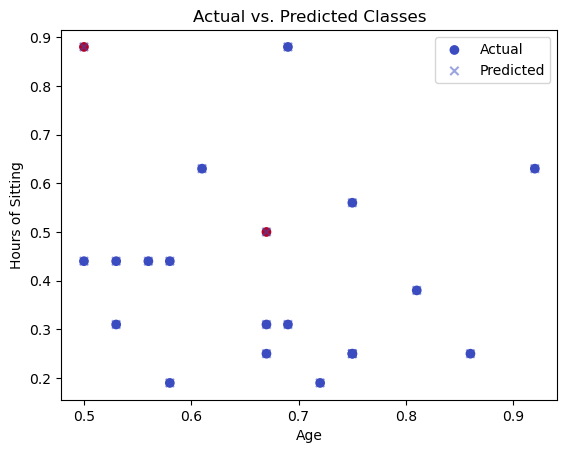

In [15]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

def predict(w, X):
    return [1 if hx(w, np.array([x])) >= 0.5 else 0 for x in X]

Y_pred = predict(w, X_test)

accuracy = accuracy_score(Y_test, Y_pred)
conf_matrix = confusion_matrix(Y_test, Y_pred)
precision = precision_score(Y_test, Y_pred)
recall = recall_score(Y_test, Y_pred)
f1 = f1_score(Y_test, Y_pred)

fpr, tpr, thresholds = roc_curve(Y_test, Y_pred)
roc_auc = auc(fpr, tpr)

y_pred_prob = [hx(w, np.array([x])) for x in X_test]
logloss = log_loss(Y_test, y_pred_prob)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC:", roc_auc)
print("Log Loss:", logloss)

plt.scatter(X_test[:,0], X_test[:,1], c=Y_test, cmap='coolwarm', marker='o', label='Actual')
plt.scatter(X_test[:,0], X_test[:,1], c=Y_pred, cmap='coolwarm', marker='x', label='Predicted', alpha=0.5)
plt.xlabel('Age')
plt.ylabel('Hours of Sitting')
plt.title('Actual vs. Predicted Classes')
plt.legend()
plt.show()

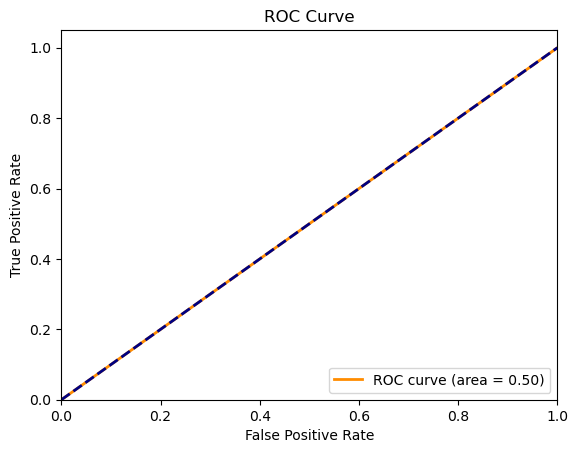

In [16]:
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()